In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#load the file
data = pd.read_csv(r"Model_Performance_Comparison.csv", encoding='ISO-8859-1')

data.head()

,Model,RMSE,MAE,R²
0,Linear Regression,0.085,0.066,0.37
1,Random Forest,0.044,0.033,0.83
2,Random Forest (5 features),0.055,0.041,0.74
3,LightGBM,0.042,0.031,0.85
4,SVR,0.052,0.037,0.77


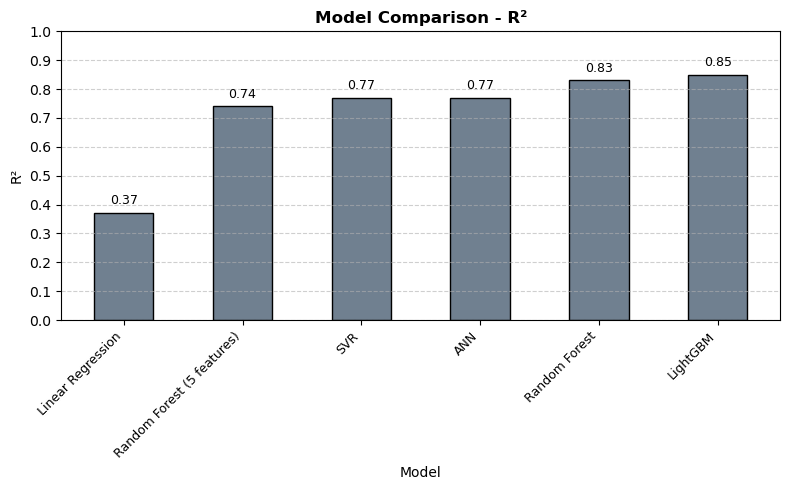

In [ ]:
models = data['Model']
r2 = data['R²']

# Sorting models by R² in ascending order
sorted_indices = r2.sort_values().index
sorted_models = models[sorted_indices]
sorted_r2 = r2[sorted_indices]

# R² values with models sorted in ascending order
fig, ax = plt.subplots(figsize=(8, 5))  # Smaller figure size

# the vertical bar plot for R² with adjusted bar width
bars = ax.bar(sorted_models, sorted_r2, color='slategray', edgecolor='black', width=0.5) 

# R² values above each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (R² value)
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

# y-ticks to range from 0 to 1 with intervals of 0.1
ax.set_yticks(np.arange(0, 1.1, 0.1))

# labels, title, and formatting
ax.set_xlabel('Model', fontsize=10)
ax.set_ylabel('R²', fontsize=10)
ax.set_title('Model Comparison - R²', fontsize=12, fontweight='bold')

# Rotate x-ticks 
plt.xticks(rotation=45, ha='right', fontsize=9)

# Grid and layout 
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("05.Model_comparison_r2.png", dpi=600)
plt.show()
